In [ ]:
# Load necessary libraries
library(psych)
library(GPArotation) 
library(paran)
library(ggplot2)
library(maps)
library(dplyr)
library(ggcorrplot)


set.seed(123)
# 1. Load the raw data
df <- read.csv("MalayData.csv", stringsAsFactors = TRUE)


# Both dimensions as a vector [rows, columns]
print("Dataframe Dimensions (Rows, Columns):")
dim(df)

# ---------------------------------------------------------
# 2. Dependant Variables summary
# ---------------------------------------------------------
cat_vars <- c("Sex", "Nationality", "Where.are.you.currently.studying.", 
              "Age", "Education", "Work.experience")

num_vars <- c("No..of.languages.spoken")

# ---------------------------------------------------------
# 3. Categorical Data Reporting (Counts & Percentages)
# ---------------------------------------------------------
print("--- Categorical Variable Breakdown ---")

for(var in cat_vars){
  # Create a frequency table
  counts <- table(df[[var]])
  
  # Calculate percentages
  percents <- prop.table(counts) * 100
  
  # Combine into a clean dataframe for viewing
  summary_table <- data.frame(
    Count = as.numeric(counts),
    Percentage = round(as.numeric(percents), 2)
  )
  row.names(summary_table) <- names(counts)
  
  # Print the result
  print(paste(">>> Description for:", var))
  print(summary_table)
  cat("\n") # Add a blank line for readability
}

# ---------------------------------------------------------
# 4. Numerical Data Reporting (Mean, SD, Min, Max)
# ---------------------------------------------------------
print("--- Numerical Variable Statistics ---")

num_stats <- describe(df[num_vars])

# Print just the relevant columns for a basic report
print(num_stats[, c("n", "mean", "sd", "median", "min", "max")])

[1] "Dataframe Dimensions (Rows, Columns):"


[1] 359  71

[1] "--- Categorical Variable Breakdown ---"
[1] ">>> Description for: Sex"
                  Count Percentage
                      1       0.28
Female              236      65.74
Male                115      32.03
Prefer not to say     7       1.95

[1] ">>> Description for: Nationality"
                   Count Percentage
-                      1       0.28
Azerbaijan             1       0.28
Azerbaijani            1       0.28
Bangladeshi            1       0.28
Black British          1       0.28
British               11       3.06
British                8       2.23
bulgarian              1       0.28
Bulgarian              2       0.56
Bumiputera             2       0.56
Chile                  1       0.28
China                  1       0.28
China                  1       0.28
Chinese                1       0.28
Citizen                1       0.28
Costa Rican            1       0.28
Cypriot                1       0.28
France                 1       0.28
Georgian               2 

Warning message in describe.1(x = x, na.rm = na.rm, interp = interp, skew = skew, :
“You were trying to describe a non-numeric data.frame or vector which describe converted  to numeric.”


                          n mean   sd median min max
No..of.languages.spoken 359 2.18 0.84      2   1   5


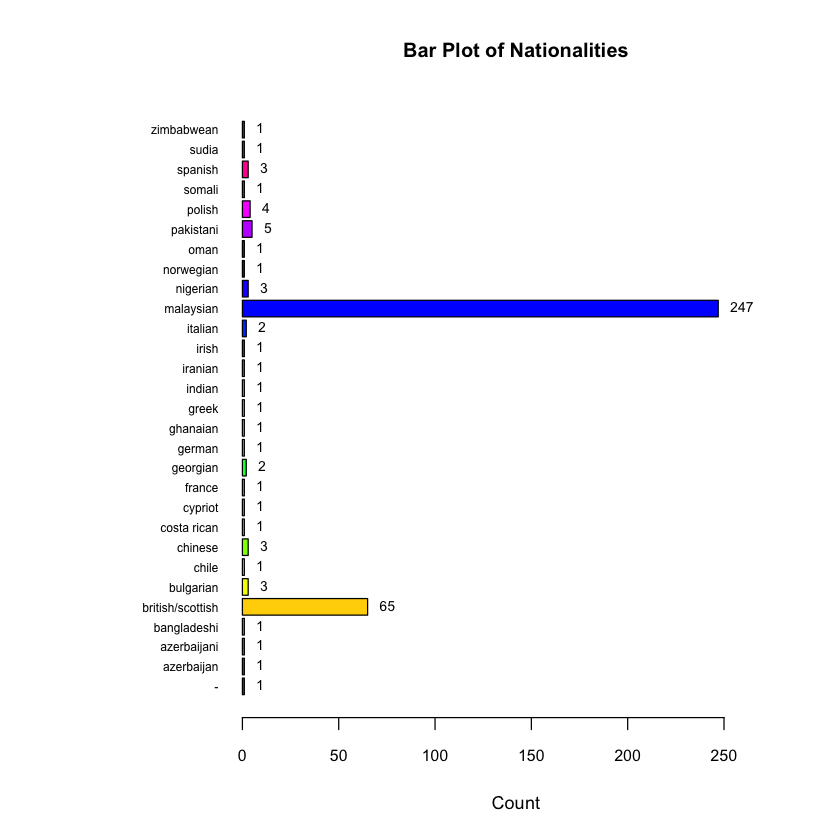

In [111]:
# Clean nationality variable
# Change to lowercase and trim whitespace
df$Nationality <- tolower(trimws(df$Nationality))

# Standardize nationality variations - comprehensive patterns
# Malaysian variations
df$Nationality <- gsub("^malay$|^malaysia$|^malaysian$|^melayu$|^warganegara$|^bumiputera$", "malaysian", df$Nationality)

# British variations  
df$Nationality <- gsub("^british$|^scottish$|^scottish british$|^white british$|^black british$|^scottish/lebanese$", "british/scottish", df$Nationality)

# Chinese variations
df$Nationality <- gsub("^china$|^chinese$", "chinese", df$Nationality)

# Indian variations
df$Nationality <- gsub("^india$|^indian$", "indian", df$Nationality)

# Pakistani variations
df$Nationality <- gsub("^pakistani$|^scottish pakistani$", "pakistani", df$Nationality)

# Nigerian variations
df$Nationality <- gsub("^nigeria$|^nigerian$", "nigerian", df$Nationality)

# Other standardizations
df$Nationality <- gsub("^bulgarian$", "bulgarian", df$Nationality)
df$Nationality <- gsub("^italian$", "italian", df$Nationality)
df$Nationality <- gsub("^polish$", "polish", df$Nationality)
df$Nationality <- gsub("^spanish$", "spanish", df$Nationality)
df$Nationality <- gsub("^georgian$", "georgian", df$Nationality)

# Remove invalid entries
df$Nationality <- gsub("^national$|^nationality$|^citizen$", NA, df$Nationality)

# Get frequency table (excluding NA values)
nationality_counts <- table(df$Nationality[!is.na(df$Nationality)])

par(mar = c(5, 10, 4, 2) + 0.1)

# Create color palette with different colors for each bar
bar_colors <- rainbow(length(nationality_counts))

bp <- barplot(nationality_counts, 
        main = "Bar Plot of Nationalities",
        xlab = "Count",
        col = bar_colors,
        las = 1,
        horiz = TRUE,
        xlim = c(0, max(nationality_counts) * 1.15),
        cex.names = 0.6,   
        cex.axis = 0.8,    
        cex.lab = 0.9,    
        cex.main = 1.0  
  )

# Add counts at the end of each bar
text(x = nationality_counts, 
     y = bp, 
     labels = nationality_counts, 
     pos = 4,  
     cex = 0.7,  
     col = "black")

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)


In [112]:
# summary(df)
other_vars <- df[, 8:15]  
summary(other_vars)

 If.you.selected.recently.employed.to.the.previous.question..did.you.resign.from.your.position.
    :105                                                                                       
 No :134                                                                                       
 Yes:120                                                                                       
 Have.you.ever.started.a.business. Have.your.parents.ever.started.a.business.
 No :204                           No :146                                   
 Yes:155                           Yes:213                                   
                                                                             
 Has.anyone.else.you.known.started.a.business.
 No : 34                                      
 Yes:325                                      
                                              
 Have.you.ever.worked.for.a.small.or.new.company.
 No :137                                         
 Yes:222        

In [113]:
## Check for missing values in liket scale variabless
pca_data <- df[, 16:65]

#Convert the likert scale column names to numbers 1 to 50
names(pca_data) <- 1:50

# Check for missing values in pca_data
sum(is.na(pca_data))

[1] 0

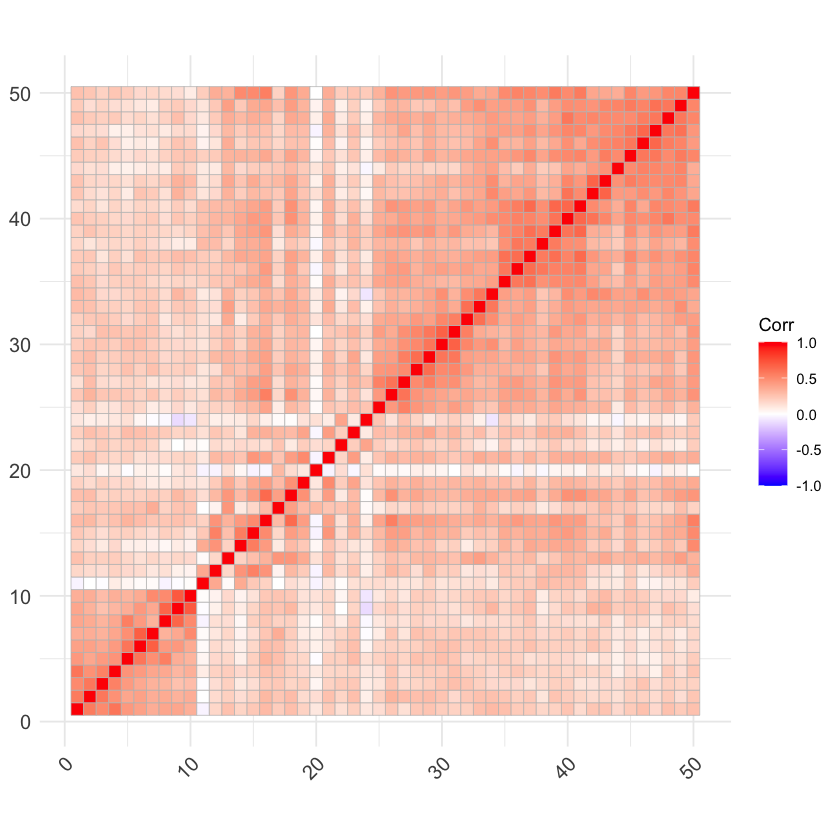

In [114]:
# Calculate the correlation matrix of the likert scale variables
cor_matrix <- cor(pca_data, use = "pairwise.complete.obs")

# Visualize the correlation matrix using ggcorrplot
ggcorrplot(cor_matrix)

In [115]:
install.packages("ggcorrplot")


The downloaded binary packages are in
	/var/folders/6j/vbxn4v7s5xl046hwx1j8ppnm0000gn/T//RtmpFd7ZMt/downloaded_packages


## Check if the data is suitable for PCA
### Handle missing values
### Kaiser-Meyer-Olkin (KMO) Test
### Bartlett’s Test of Sphericity

In [116]:
# 1. Run Kaiser-Meyer-Olkin (KMO) Test
# Checks if there is sufficient dimentionality in the data for PCA
kmo_result <- KMO(pca_data)
print("Kaiser-Meyer-Olkin (KMO) Test Result:")
print(kmo_result)

[1] "Kaiser-Meyer-Olkin (KMO) Test Result:"
Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = pca_data)
Overall MSA =  0.92
MSA for each item = 
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
0.91 0.87 0.88 0.91 0.86 0.83 0.82 0.82 0.80 0.80 0.78 0.88 0.95 0.86 0.94 0.94 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
0.86 0.94 0.93 0.50 0.93 0.83 0.91 0.68 0.92 0.94 0.93 0.94 0.94 0.93 0.91 0.93 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
0.94 0.94 0.96 0.95 0.94 0.94 0.96 0.95 0.95 0.93 0.93 0.93 0.96 0.93 0.94 0.96 
  49   50 
0.94 0.95 


In [117]:

# 2. Run Bartlett's Test
# Checks if the correlation matrix is significantly different from an identity matrix
print("Bartlett's Test Result:")
cortest.bartlett(cor(pca_data), n = nrow(pca_data))

[1] "Bartlett's Test Result:"


$chisq
[1] 10041.92

$p.value
[1] 0

$df
[1] 1225

# Determining number of components
### Step 1: Qualitative Assessment (Scree Plot)
### Step 2: Eigenvalue Assessment (Kaiser Rule)
### Step 3: Horn’s Parallel Analysis (Preferred Method)

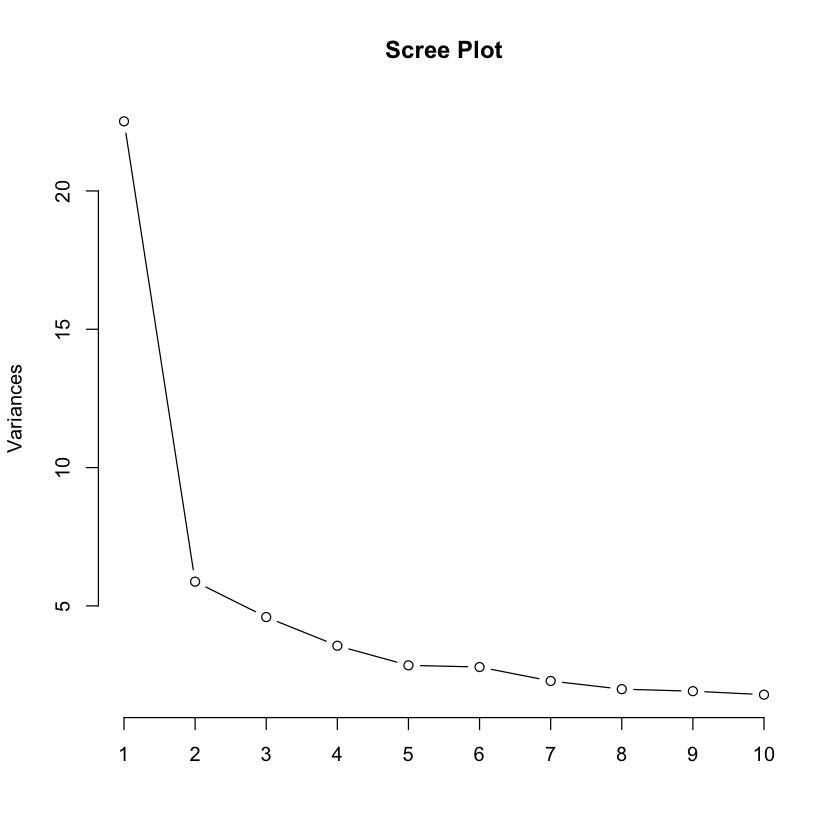

In [118]:

# # 1. Perform PCA 
# # scale. = TRUE is critical for Likert data to standardize variance
pca_morpho <- prcomp(pca_data)

# # 2. Calculate Eigenvalues (Variance)
eigenvalues <- pca_morpho$sdev^2

# # 3. Plot the Scree Plot
screeplot(pca_morpho, type = "lines", main = "Scree Plot",)



In [119]:
# 4. Print Kaiser Rule Assessment
print("--- Eigenvalue Assessment (Kaiser Rule) ---")
print(round(eigenvalues, 3)) 

print("--- Number of Components with Eigenvalue > 1 ---")
print(sum(eigenvalues > 1))


[1] "--- Eigenvalue Assessment (Kaiser Rule) ---"
 [1] 22.517  5.876  4.596  3.559  2.852  2.790  2.285  1.990  1.917  1.791
[11]  1.579  1.484  1.353  1.302  1.208  1.117  1.092  1.060  1.032  0.948
[21]  0.895  0.835  0.810  0.803  0.768  0.726  0.686  0.665  0.636  0.613
[31]  0.580  0.537  0.514  0.510  0.492  0.478  0.459  0.452  0.418  0.413
[41]  0.387  0.368  0.350  0.338  0.312  0.285  0.261  0.243  0.239  0.177
[1] "--- Number of Components with Eigenvalue > 1 ---"
[1] 19


In [120]:
# 5. Parallel Analysis
print("--- Parallel Analysis Result ---")
paran_result <- paran(pca_data, graph = FALSE)

[1] "--- Parallel Analysis Result ---"

Using eigendecomposition of correlation matrix.
Computing: 10%  20%  30%  40%  50%  60%  70%  80%  90%  100%


Results of Horn's Parallel Analysis for component retention
1500 iterations, using the mean estimate

-------------------------------------------------- 
Component   Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
1          14.306887   15.113885      0.806998
2           3.217046    3.943432      0.726385
3           2.138483    2.803290      0.664806
4           1.386787    1.998406      0.611618
5           1.207072    1.771876      0.564803
6           1.021256    1.542601      0.521344
-------------------------------------------------- 

Adjusted eigenvalues > 1 indicate dimensions to retain.
(6 components retained)



In [121]:
# calculating the principal component scores
fit <- pca(pca_data, 6)
fit

Principal Components Analysis
Call: principal(r = r, nfactors = nfactors, residuals = residuals, 
    rotate = rotate, n.obs = n.obs, covar = covar, scores = scores, 
    missing = missing, impute = impute, oblique.scores = oblique.scores, 
    method = method, use = use, cor = cor, correct = 0.5, weight = NULL)
Standardized loadings (pattern matrix) based upon correlation matrix
     RC1   RC3   RC2   RC4   RC5   RC6   h2   u2 com
1   0.19  0.00  0.66  0.10  0.19  0.17 0.54 0.46 1.6
2   0.09  0.13  0.63  0.10  0.19  0.18 0.50 0.50 1.6
3   0.10  0.05  0.61  0.02  0.19  0.31 0.52 0.48 1.8
4   0.07  0.05  0.68  0.13  0.11  0.24 0.55 0.45 1.4
5  -0.04  0.19  0.71  0.11  0.07  0.10 0.57 0.43 1.3
6   0.06  0.20  0.74  0.04 -0.04  0.03 0.59 0.41 1.2
7   0.06  0.21  0.68 -0.01  0.02 -0.05 0.51 0.49 1.2
8   0.10  0.04  0.71  0.09 -0.02 -0.19 0.56 0.44 1.2
9   0.26  0.06  0.66  0.01  0.05 -0.41 0.68 0.32 2.1
10  0.21  0.08  0.65 -0.03  0.03 -0.31 0.57 0.43 1.7
11  0.10  0.08 -0.05  0.50 -0.16  

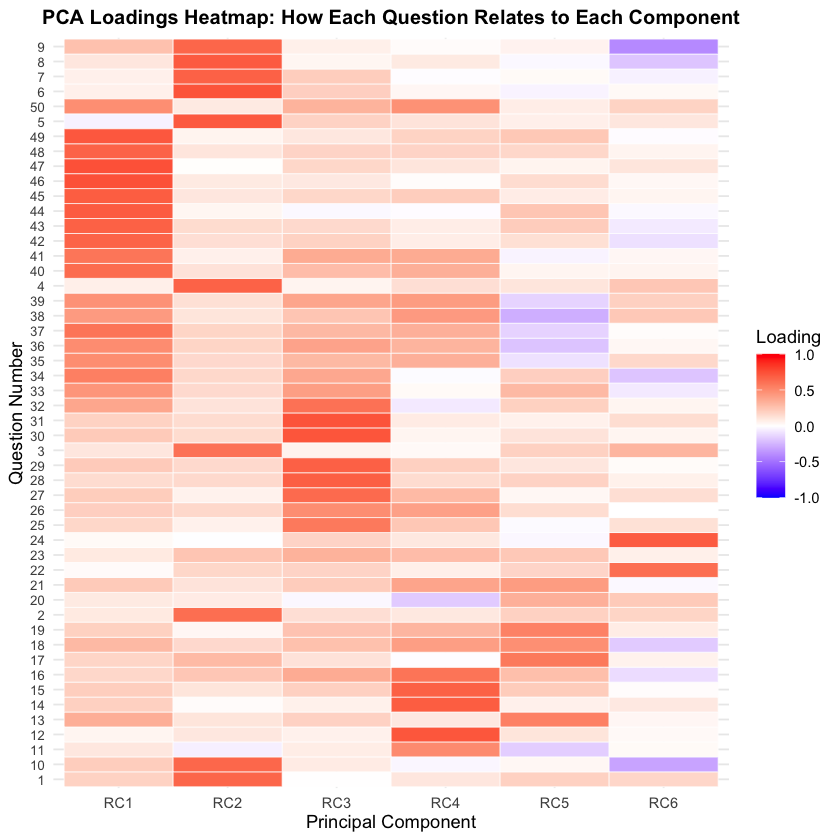

In [ ]:
# 1. HEATMAP OF LOADINGS (Best for seeing patterns)
# Extract loadings matrix
loadings_matrix <- as.data.frame(fit$loadings[])

# Create a heatmap-friendly format
loadings_long <- data.frame(
  Question = rep(rownames(loadings_matrix), ncol(loadings_matrix)),
  Component = rep(colnames(loadings_matrix), each = nrow(loadings_matrix)),
  Loading = as.vector(as.matrix(loadings_matrix))
)

# Create heatmap
ggplot(loadings_long, aes(x = Component, y = as.factor(Question), fill = Loading)) +
  geom_tile(color = "white", linewidth = 0.2) +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                       midpoint = 0, limits = c(-1, 1)) +
  labs(
    title = "PCA Loadings Heatmap: How Each Question Relates to Each Component",
    x = "Principal Component",
    y = "Question Number",
    fill = "Loading"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 8),
    plot.title = element_text(size = 12, face = "bold", hjust = 0.5)
  )


In [122]:
# Add component scores to the original data
df_pca <- cbind(df[1:65], fit$scores)
head(df_pca)

,Sex,Nationality,Where.are.you.currently.studying.,Age,Education,No..of.languages.spoken,Work.experience,If.you.selected.recently.employed.to.the.previous.question..did.you.resign.from.your.position.,Have.you.ever.started.a.business.,Have.your.parents.ever.started.a.business.,⋯,I.can.manage.risk.effectively,I.can.be.persistent.even.when.things.go.wrong,I.can.plan.for.the.future,I.have.the.necessary.abilities.to.start.a.new.business,RC1,RC3,RC2,RC4,RC5,RC6
,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Female,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),,No,Yes,⋯,4,4,4,4,0.92727970,-0.3366490,0.4060682,-1.4924637,0.60244087,-1.99761675
2,Male,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),No,No,No,⋯,5,1,4,4,-0.21287039,-0.8762071,-0.6365003,-1.9579569,0.37509795,1.82208169
3,Female,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),,No,No,⋯,4,4,4,4,-1.23431794,-1.1477526,0.4214215,0.4898126,-0.02149952,-1.65238930
4,Male,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),,No,Yes,⋯,4,6,6,6,0.07656282,1.2743405,-0.9197605,-0.5086744,1.89307718,0.01294519
5,Female,british/scottish,Scotland,18-29,Graduate,1,Recently employed,No,No,Yes,⋯,5,5,7,4,0.90744418,-1.8503587,1.2418202,0.7012846,0.64120644,-0.20142807
6,Female,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),No,No,Yes,⋯,6,6,7,4,0.90884695,-0.3353294,1.4705234,-3.0016030,1.49104233,-0.74635559


In [123]:
# Save the new dataframe with PCA scores
write.csv(df_pca, "MalayDataNew_PCA.csv", row.names = FALSE)

# Group the questions

In [124]:
# Function to group questions by component based on loading threshold
group_questions_by_component <- function(pca_fit, threshold = 0.4) {
  # Extract loadings matrix
  loadings_matrix <- pca_fit$loadings
  
  # Get the loadings as a matrix (remove class attributes)
  load_mat <- as.matrix(loadings_matrix)
  
  # Create an empty list to store questions for each component
  component_groups <- list()
  
  # Get component names (RC1, RC2, etc.)
  comp_names <- colnames(load_mat)
  
  # Loop through each component
  for (comp in comp_names) {
    # Find questions where absolute loading > threshold
    questions <- which(abs(load_mat[, comp]) > threshold)
    
    # Store results with question number and loading value
    if (length(questions) > 0) {
      component_groups[[comp]] <- data.frame(
        Question = questions,
        Loading = load_mat[questions, comp]
      )
      # Sort by absolute loading (highest to lowest)
      component_groups[[comp]] <- component_groups[[comp]][
        order(abs(component_groups[[comp]]$Loading), decreasing = TRUE), 
      ]
    } else {
      component_groups[[comp]] <- data.frame(
        Question = integer(0),
        Loading = numeric(0)
      )
    }
  }
  
  return(component_groups)
}

# Use the function
question_groups <- group_questions_by_component(fit, threshold = 0.4)

# Print results
for (comp_name in names(question_groups)) {
  cat("\n====================\n")
  cat(comp_name, "- Questions with |loading| > 0.4:\n")
  cat("====================\n")
  print(question_groups[[comp_name]])
}




RC1 - Questions with |loading| > 0.4:
   Question   Loading
47       47 0.7471724
46       46 0.7465389
49       49 0.7182052
44       44 0.7001272
45       45 0.6977548
43       43 0.6810893
48       48 0.6742904
42       42 0.6695838
40       40 0.6342173
37       37 0.5982368
41       41 0.5922697
34       34 0.5501392
36       36 0.4944525
35       35 0.4917941
50       50 0.4827457
39       39 0.4683100
33       33 0.4549987
38       38 0.4309819

RC3 - Questions with |loading| > 0.4:
   Question   Loading
31       31 0.7344969
30       30 0.7285139
28       28 0.6930309
29       29 0.6841180
27       27 0.6392868
32       32 0.6092853
25       25 0.5773235
26       26 0.4892598
33       33 0.4134820

RC2 - Questions with |loading| > 0.4:
   Question   Loading
6         6 0.7353361
5         5 0.7093962
8         8 0.7062138
7         7 0.6773693
4         4 0.6752869
9         9 0.6584400
1         1 0.6570439
10       10 0.6517521
2         2 0.6265375
3         3 0.6113378

RC

## Handling cross loadings 

Item 33 appears in RC1 (loading 0.454) AND RC3 (loading 0.413)

Item 38 appears in RC1 (loading 0.430) AND RC4 (loading 0.432)

Item 39 appears in RC1 (loading 0.468) AND RC4 (loading 0.427)

Item 50 appears in RC1 (loading 0.482) AND RC4 (loading 0.470)

Item 26 appears in RC3 (loading 0.489) AND RC4 (loading 0.403)

Item 9 appears in RC2 (loading 0.658) AND RC6 (loading 0.408)

In [125]:
# Define items to remove from each component
items_to_remove <- list(
  RC1 = c(50),         
  RC2 = c(),          
  RC3 = c(33),        
  RC4 = c(38, 39, 26),  
  RC5 = c(),          
  RC6 = c(9)          
)

# Create cleaned question groups
cleaned_question_groups <- question_groups

for (comp_name in names(items_to_remove)) {
  items_to_drop <- items_to_remove[[comp_name]]
  
  if (length(items_to_drop) > 0) {
    # Remove rows where Question is in items_to_drop
    cleaned_question_groups[[comp_name]] <- cleaned_question_groups[[comp_name]][
      !(cleaned_question_groups[[comp_name]]$Question %in% items_to_drop), 
    ]
  }
}

# Print cleaned results
cat("\n========== CLEANED QUESTION GROUPS ==========\n")
for (comp_name in names(cleaned_question_groups)) {
  cat("\n====================\n")
  cat(comp_name, "- Questions after removing cross-loadings:\n")
  cat("====================\n")
  print(cleaned_question_groups[[comp_name]])
  cat("Total items:", nrow(cleaned_question_groups[[comp_name]]), "\n")
}




========== CLEANED QUESTION GROUPS ==========

RC1 - Questions after removing cross-loadings:
   Question   Loading
47       47 0.7471724
46       46 0.7465389
49       49 0.7182052
44       44 0.7001272
45       45 0.6977548
43       43 0.6810893
48       48 0.6742904
42       42 0.6695838
40       40 0.6342173
37       37 0.5982368
41       41 0.5922697
34       34 0.5501392
36       36 0.4944525
35       35 0.4917941
39       39 0.4683100
33       33 0.4549987
38       38 0.4309819
Total items: 17 

RC3 - Questions after removing cross-loadings:
   Question   Loading
31       31 0.7344969
30       30 0.7285139
28       28 0.6930309
29       29 0.6841180
27       27 0.6392868
32       32 0.6092853
25       25 0.5773235
26       26 0.4892598
Total items: 8 

RC2 - Questions after removing cross-loadings:
   Question   Loading
6         6 0.7353361
5         5 0.7093962
8         8 0.7062138
7         7 0.6773693
4         4 0.6752869
9         9 0.6584400
1         1 0.6570439
10    

## Are the components reliable
## Should I use all of them 
## 1. Reliability (Cronbach’s α)


In [126]:
# Cronbach's Alpha for each componen
# Checks how close related a set of items are as a group
for (comp_name in names(cleaned_question_groups)) {
    questions <- question_groups[[comp_name]]$Question
    comp_data <- pca_data[, questions]
    cronbach_alpha <- psych::alpha(comp_data)
    cat("\n====================\n")
    cat("Cronbach's Alpha for", comp_name, ":\n")
    cat("====================\n")
    print(cronbach_alpha$total$raw_alpha)
}


Cronbach's Alpha for RC1 :
[1] 0.9375112

Cronbach's Alpha for RC3 :
[1] 0.88185

Cronbach's Alpha for RC2 :
[1] 0.8817913

Cronbach's Alpha for RC4 :
[1] 0.8613388

Cronbach's Alpha for RC5 :
[1] 0.760301


Warning message in psych::alpha(comp_data):
“Some items were negatively correlated with the first principal component and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”


Some items ( 9 ) were negatively correlated with the first principal component and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option
Cronbach's Alpha for RC6 :
[1] 0.2686686


In [127]:
# Cronbach's Alpha for each component (with automatic key reversal)
# Checks how close related a set of items are as a group
for (comp_name in names(cleaned_question_groups)) {
    questions <- question_groups[[comp_name]]$Question
    comp_data <- pca_data[, questions]
    cronbach_alpha <- psych::alpha(comp_data, check.keys = TRUE)
    cat("\n====================\n")
    cat("Cronbach's Alpha for", comp_name, ":\n")
    cat("====================\n")
    print(cronbach_alpha$total$raw_alpha)
    cat("Keys (reversed items):", paste(cronbach_alpha$keys, collapse = ", "), "\n")
}


Cronbach's Alpha for RC1 :
[1] 0.9375112
Keys (reversed items): c("47", "46", "49", "44", "45", "43", "48", "42", "40", "37", "41", "34", "36", "35", "50", "39", "33", "38") 

Cronbach's Alpha for RC3 :
[1] 0.88185
Keys (reversed items): c("31", "30", "28", "29", "27", "32", "25", "26", "33") 

Cronbach's Alpha for RC2 :
[1] 0.8817913
Keys (reversed items): c("6", "5", "8", "7", "4", "9", "1", "10", "2", "3") 

Cronbach's Alpha for RC4 :
[1] 0.8613388
Keys (reversed items): c("12", "14", "15", "16", "11", "50", "38", "39", "18", "26") 

Cronbach's Alpha for RC5 :
[1] 0.760301
Keys (reversed items): c("17", "13", "19", "18", "21") 


Warning message in psych::alpha(comp_data, check.keys = TRUE):
“Some items were negatively correlated with the first principal component and were automatically reversed.
 This is indicated by a negative sign for the variable name.”



Cronbach's Alpha for RC6 :
[1] 0.4063978
Keys (reversed items): c("24", "22", "-9") 


In [128]:
# Drop RC4 due to low reliability (alpha < 0.7) even after key reversal
# Drop the last column
df_pca <- df_pca[, -ncol(df_pca)]
head(df_pca)

,Sex,Nationality,Where.are.you.currently.studying.,Age,Education,No..of.languages.spoken,Work.experience,If.you.selected.recently.employed.to.the.previous.question..did.you.resign.from.your.position.,Have.you.ever.started.a.business.,Have.your.parents.ever.started.a.business.,⋯,I.can.manage.my.time.effectively,I.can.manage.risk.effectively,I.can.be.persistent.even.when.things.go.wrong,I.can.plan.for.the.future,I.have.the.necessary.abilities.to.start.a.new.business,RC1,RC3,RC2,RC4,RC5
,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Female,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),,No,Yes,⋯,7,4,4,4,4,0.92727970,-0.3366490,0.4060682,-1.4924637,0.60244087
2,Male,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),No,No,No,⋯,5,5,1,4,4,-0.21287039,-0.8762071,-0.6365003,-1.9579569,0.37509795
3,Female,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),,No,No,⋯,4,4,4,4,4,-1.23431794,-1.1477526,0.4214215,0.4898126,-0.02149952
4,Male,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),,No,Yes,⋯,6,4,6,6,6,0.07656282,1.2743405,-0.9197605,-0.5086744,1.89307718
5,Female,british/scottish,Scotland,18-29,Graduate,1,Recently employed,No,No,Yes,⋯,6,5,5,7,4,0.90744418,-1.8503587,1.2418202,0.7012846,0.64120644
6,Female,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),No,No,Yes,⋯,5,6,6,7,4,0.90884695,-0.3353294,1.4705234,-3.0016030,1.49104233


In [129]:


# Rename the PCA score columns for clarity
names(df_pca)[names(df_pca) == "RC1"] <- "self_efficacy"
names(df_pca)[names(df_pca) == "RC2"] <- "social_support"
names(df_pca)[names(df_pca) == "RC3"] <- "risk_taking"
names(df_pca)[names(df_pca) == "RC5"] <- "autonomy"
names(df_pca)[names(df_pca) == "RC4"] <- "confidence"

head(df_pca)


,Sex,Nationality,Where.are.you.currently.studying.,Age,Education,No..of.languages.spoken,Work.experience,If.you.selected.recently.employed.to.the.previous.question..did.you.resign.from.your.position.,Have.you.ever.started.a.business.,Have.your.parents.ever.started.a.business.,⋯,I.can.manage.my.time.effectively,I.can.manage.risk.effectively,I.can.be.persistent.even.when.things.go.wrong,I.can.plan.for.the.future,I.have.the.necessary.abilities.to.start.a.new.business,self_efficacy,risk_taking,social_support,confidence,autonomy
,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Female,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),,No,Yes,⋯,7,4,4,4,4,0.92727970,-0.3366490,0.4060682,-1.4924637,0.60244087
2,Male,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),No,No,No,⋯,5,5,1,4,4,-0.21287039,-0.8762071,-0.6365003,-1.9579569,0.37509795
3,Female,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),,No,No,⋯,4,4,4,4,4,-1.23431794,-1.1477526,0.4214215,0.4898126,-0.02149952
4,Male,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),,No,Yes,⋯,6,4,6,6,6,0.07656282,1.2743405,-0.9197605,-0.5086744,1.89307718
5,Female,british/scottish,Scotland,18-29,Graduate,1,Recently employed,No,No,Yes,⋯,6,5,5,7,4,0.90744418,-1.8503587,1.2418202,0.7012846,0.64120644
6,Female,british/scottish,Scotland,18-29,Graduate,1,Employed (part time),No,No,Yes,⋯,5,6,6,7,4,0.90884695,-0.3353294,1.4705234,-3.0016030,1.49104233


In [130]:
library(ggplot2)
library(gridExtra)
library(car)

normality_stats <- function(var) {
  # Shapiro-Wilk test
  sh <- shapiro.test(df_pca[[var]])
  cat(sprintf("\n%s: Shapiro-Wilk W = %.3f, p = %.4f\n", var, sh$statistic, sh$p.value))
}

plot_normality <- function(var, label = var) {
  x <- df_pca[[var]]
  x <- x[is.finite(x) & !is.na(x)]
  
  qq_plot <- ggplot(data.frame(x = x), aes(sample = x)) +
    stat_qq() +
    stat_qq_line(color = "red") +
    labs(title = paste("Q-Q Plot:", label), x = "Theoretical Quantiles", y = "Sample Quantiles") +
    theme_minimal() +
    theme(aspect.ratio = 1)
  
  dist_plot <- ggplot(data.frame(x = x), aes(x = x)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", color = "white") +
    geom_density(color = "red", linewidth = 1) +
    labs(title = paste("Distribution:", label), x = label, y = "Density") +
    theme_minimal() +
    theme(aspect.ratio = 1)
  
  box_plot <- ggplot(data.frame(x = x), aes(y = x)) +
    geom_boxplot(fill = "lightgray", color = "black") +
    labs(title = paste("Box Plot:", label), x = NULL, y = label) +
    theme_minimal() +
    theme(aspect.ratio = 1)
  
  gridExtra::grid.arrange(qq_plot, dist_plot, box_plot, ncol = 3)
}


# Plot confidence intervals of the means for each group in each dependent variable
plot_ci_means <- function(iv, dv, data = df_pca) {
  library(ggplot2)
  library(dplyr)
  
  # Calculate means and 95% CI for each group
  ci_data <- data %>%
    group_by(.data[[iv]]) %>%
    summarise(
      mean = mean(.data[[dv]], na.rm = TRUE),
      se = sd(.data[[dv]], na.rm = TRUE) / sqrt(n()),
      ci_lower = mean - 1.96 * se,
      ci_upper = mean + 1.96 * se
    )
  
  # Plot
  ggplot(ci_data, aes(x = .data[[iv]], y = mean)) +
    geom_point(size = 3, color = "darkblue") +
    geom_errorbar(aes(ymin = ci_lower, ymax = ci_upper), 
                  width = 0.2, 
                  linewidth = 1,
                  color = "darkblue") +
    labs(title = paste("95% CI of Means:", dv, "by", iv),
         x = iv,
         y = paste("Mean", dv)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}



## Normality graphs

In [131]:
components <- c("autonomy", "risk_taking", "self_efficacy", "social_support", "confidence")
components <- intersect(components, names(df_pca))  

for (comp in components) {
  normality_stats(comp)
}


autonomy: Shapiro-Wilk W = 0.989, p = 0.0093

risk_taking: Shapiro-Wilk W = 0.977, p = 0.0000

self_efficacy: Shapiro-Wilk W = 0.980, p = 0.0001

social_support: Shapiro-Wilk W = 0.982, p = 0.0002

confidence: Shapiro-Wilk W = 0.965, p = 0.0000


Malaysia Scotland 
     252      107


autonomy: Shapiro-Wilk W = 0.989, p = 0.0093


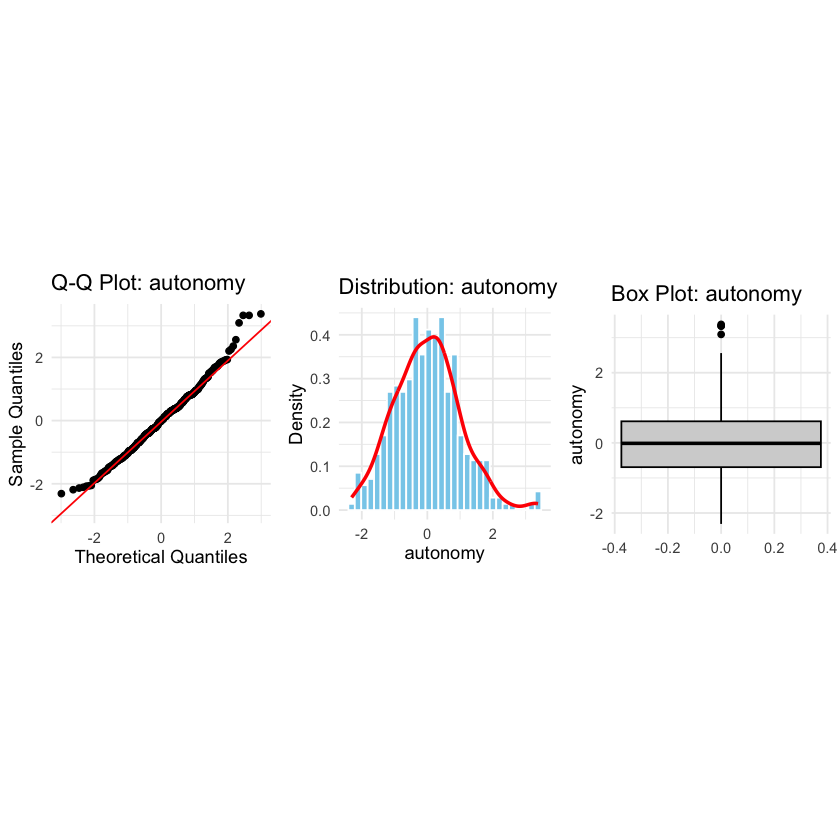

In [132]:
# here is no significant difference in Autonomy scores between students studying in Malaysia and Scotland. 

# Independent t-test
# Check number of levels
summary(df_pca$Where.are.you.currently.studying.)

# Parametric assumptions 
normality_stats("autonomy")

# Plots
plot_normality("autonomy")


risk_taking: Shapiro-Wilk W = 0.977, p = 0.0000


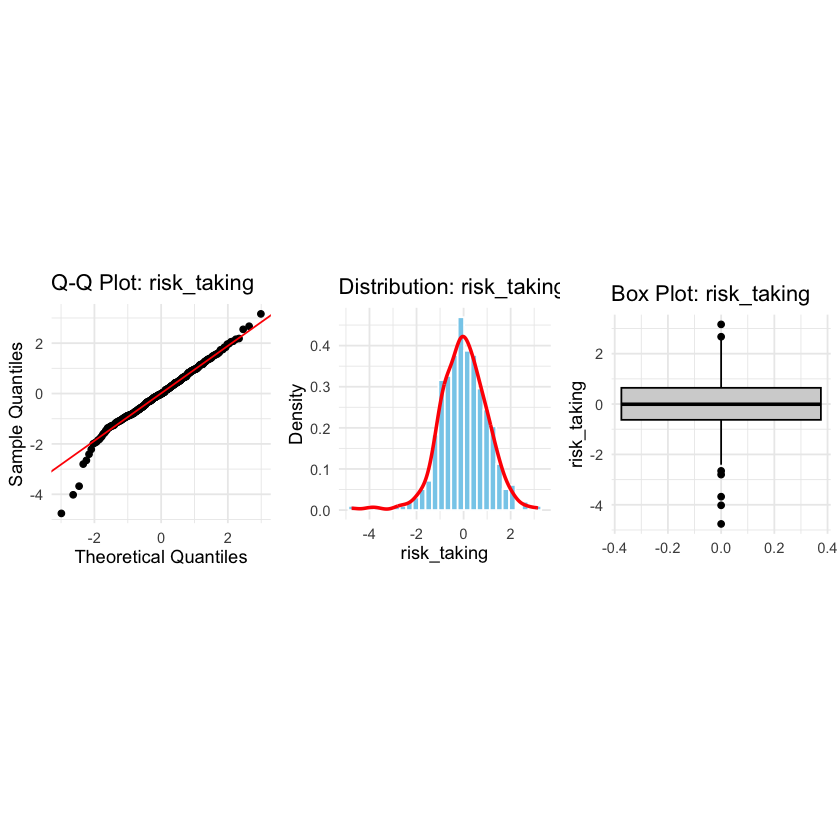

In [133]:

# For risk_taking
normality_stats("risk_taking")
plot_normality("risk_taking")


self_efficacy: Shapiro-Wilk W = 0.980, p = 0.0001


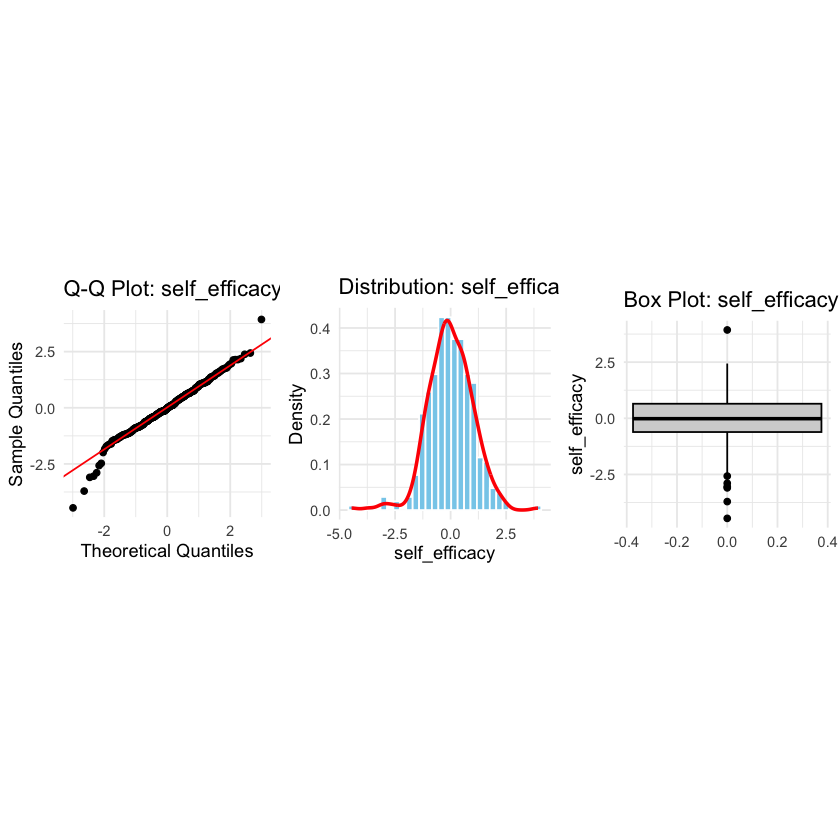

In [134]:
# For self_efficacy
normality_stats("self_efficacy")
plot_normality("self_efficacy")


confidence: Shapiro-Wilk W = 0.965, p = 0.0000


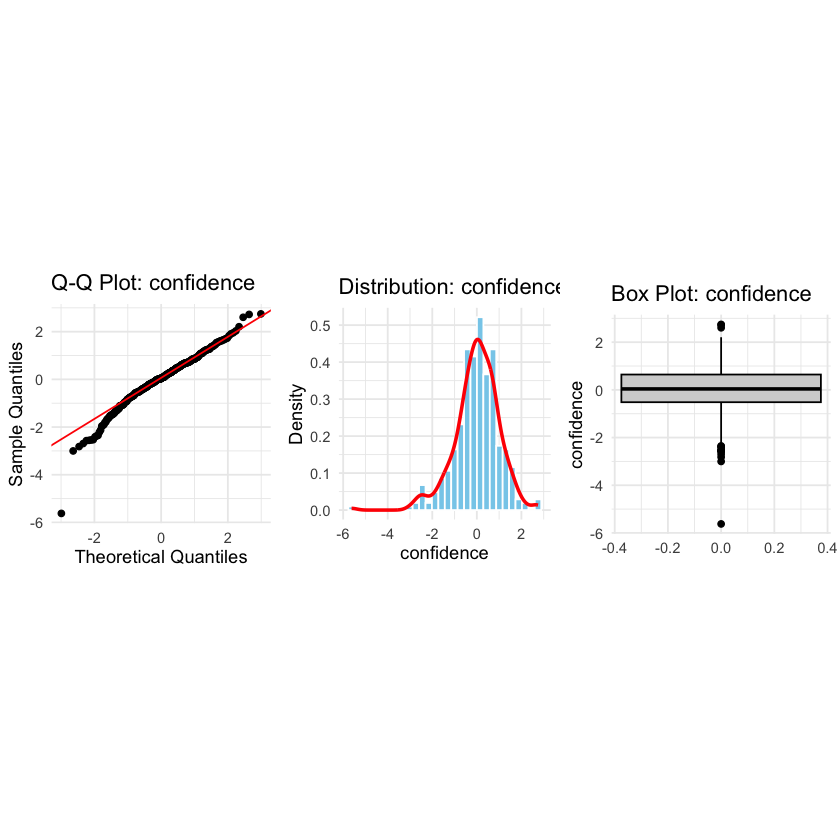

In [135]:
# For confidence
normality_stats("confidence")
plot_normality("confidence")


social_support: Shapiro-Wilk W = 0.982, p = 0.0002


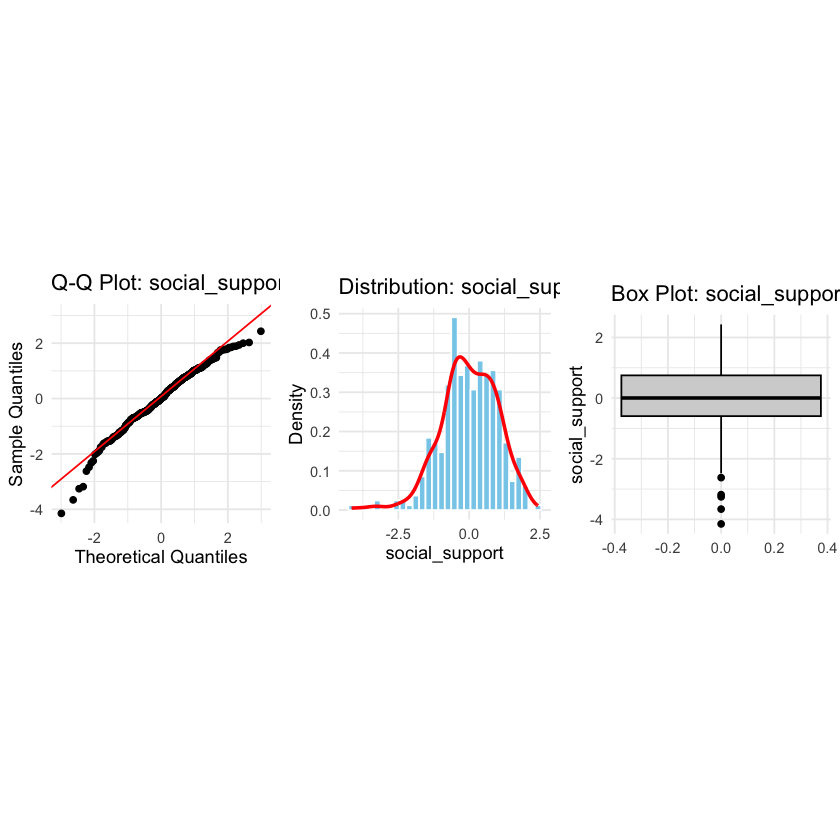

In [136]:
# For ocial_support
normality_stats("social_support")
plot_normality("social_support")

## Creating hypothesis
## Hypothesis 1: The Cultural Context Effect 

In [137]:
# Create a loop to test for levene test for autonomy, self efficcfacy and risk_taking with where studying as ivariable
components <- c("autonomy", "risk_taking", "self_efficacy")
components <- intersect(components, names(df_pca))  
for (comp in components) {
  levene_result <- car::leveneTest(df_pca[[comp]] ~ df_pca$Where.are.you.currently.studying.)
  cat(sprintf("\nLevene's Test for %s:\n", comp))
  print(levene_result)
}


Levene's Test for autonomy:
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  1.0895 0.2973
      357               

Levene's Test for risk_taking:
Levene's Test for Homogeneity of Variance (center = median)
       Df F value   Pr(>F)   
group   1  9.0622 0.002795 **
      357                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Levene's Test for self_efficacy:
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.2467 0.6197
      357               


In [170]:
# Use non-parametric test if normality is violated
# Use Wixon rank sum test (Mann-Whitney U test)
print("--- Mann-Whitney U Test (Non-parametric) ---")
mann_whitney_result <- wilcox.test(autonomy ~ Where.are.you.currently.studying., 
                                    data = df_pca)
print(mann_whitney_result)


print("--- Risk Taking ---")
mann_whitney_result <- wilcox.test(risk_taking ~ Where.are.you.currently.studying., 
                                    data = df_pca)
print(mann_whitney_result)

print("--- Self afficacy ---")
mann_whitney_result <- wilcox.test(self_efficacy ~ Where.are.you.currently.studying., 
                                    data = df_pca)
print(mann_whitney_result)


[1] "--- Mann-Whitney U Test (Non-parametric) ---"

	Wilcoxon rank sum test with continuity correction

data:  autonomy by Where.are.you.currently.studying.
W = 9422, p-value = 6.375e-06
alternative hypothesis: true location shift is not equal to 0

[1] "--- Risk Taking ---"

	Wilcoxon rank sum test with continuity correction

data:  risk_taking by Where.are.you.currently.studying.
W = 15411, p-value = 0.03202
alternative hypothesis: true location shift is not equal to 0

[1] "--- Self afficacy ---"

	Wilcoxon rank sum test with continuity correction

data:  self_efficacy by Where.are.you.currently.studying.
W = 8653, p-value = 7.936e-08
alternative hypothesis: true location shift is not equal to 0



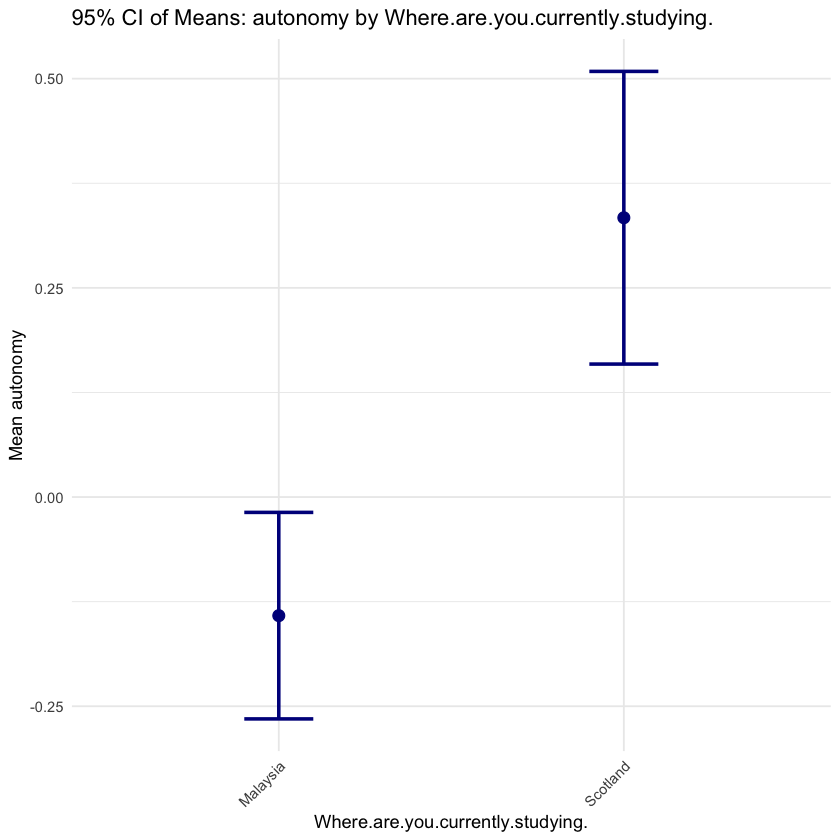

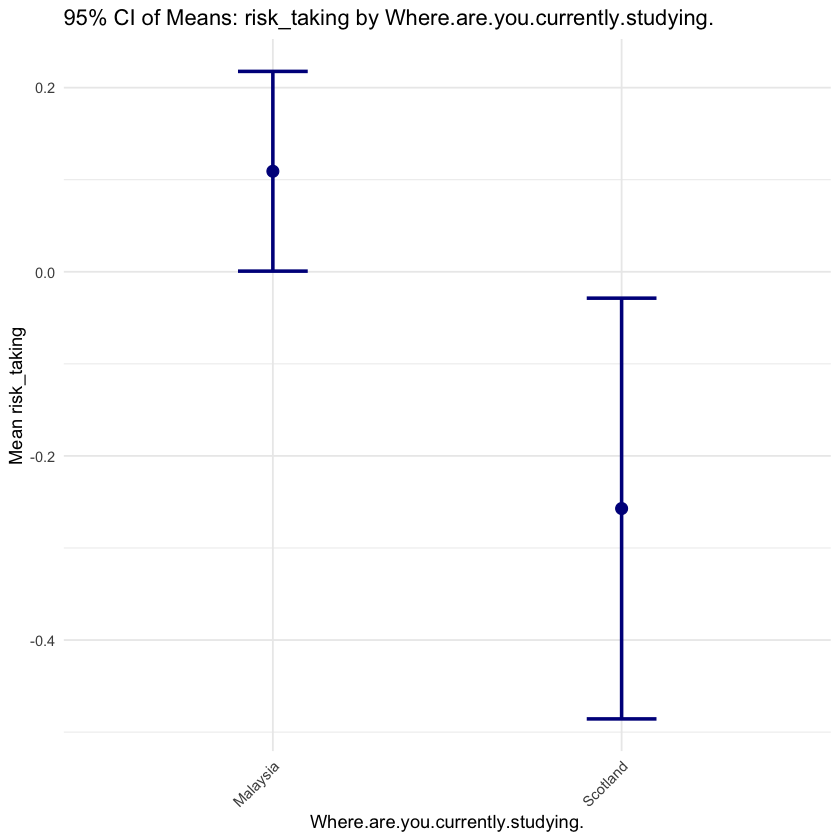

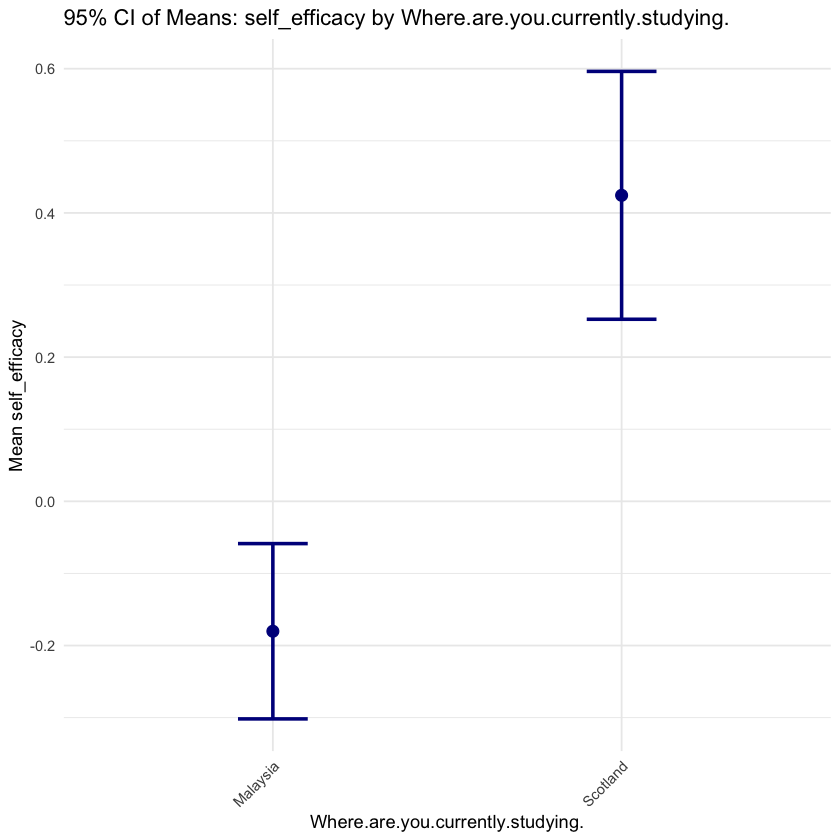

In [139]:
# Example usage:
plot_ci_means("Where.are.you.currently.studying.", "autonomy")
plot_ci_means("Where.are.you.currently.studying.", "risk_taking")
plot_ci_means("Where.are.you.currently.studying.", "self_efficacy")


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


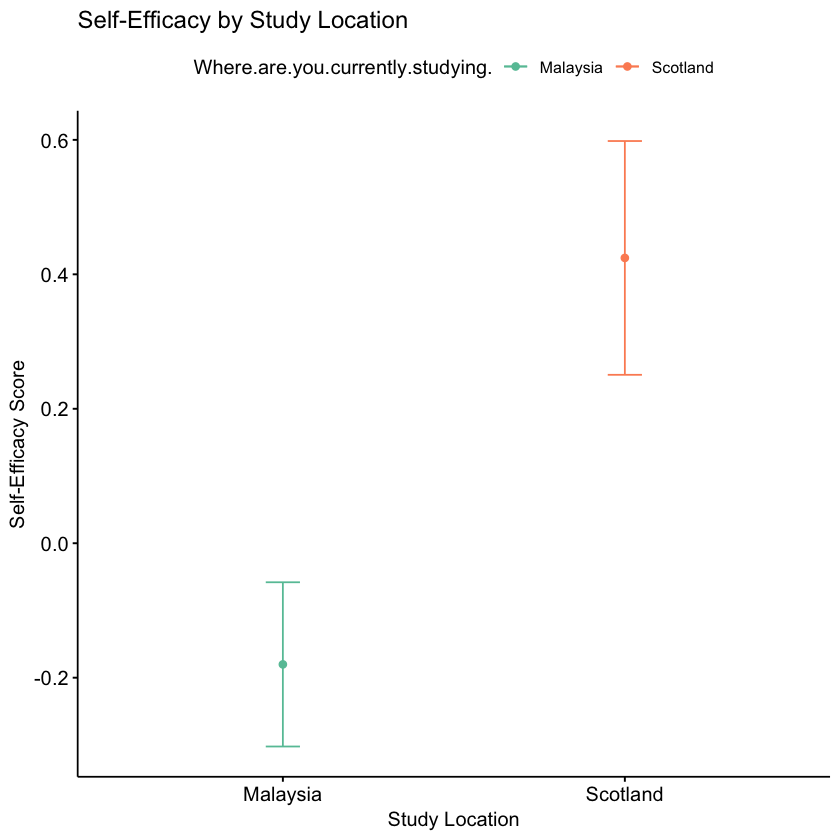

In [140]:
library(ggpubr)

# Use ggpubr to create the plots with mean and confidence intervals
ggline(df_pca, 
       x = "Where.are.you.currently.studying.", 
       y = "self_efficacy",
       add = "mean_ci",
       title = "Self-Efficacy by Study Location",
       xlab = "Study Location",
       ylab = "Self-Efficacy Score",
       color = "Where.are.you.currently.studying.",
       palette = "Set2")

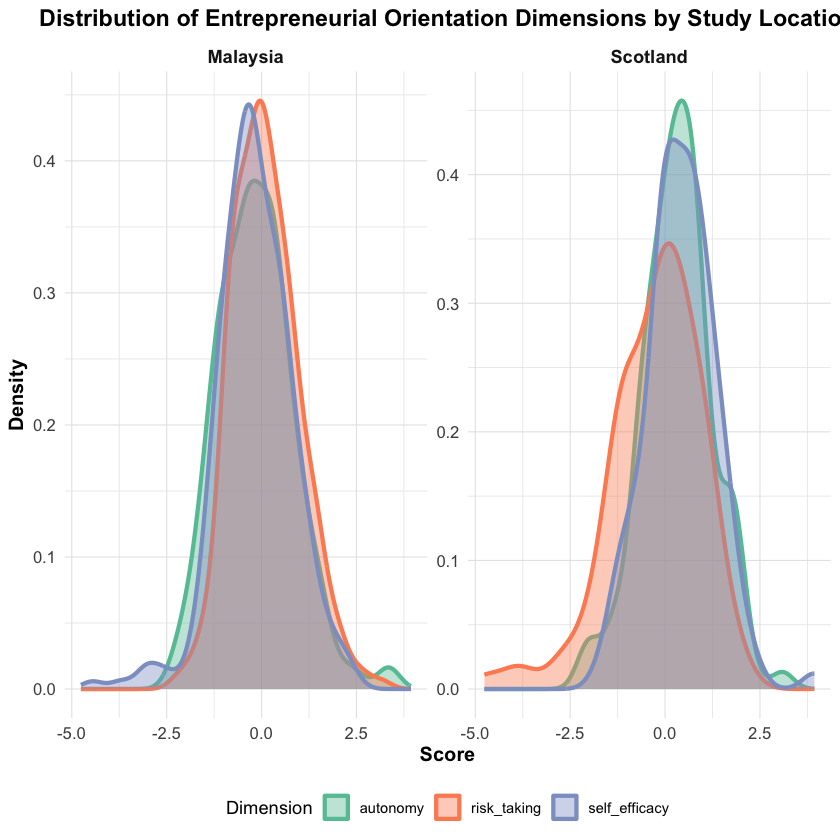

In [141]:
library(ggplot2)
library(tidyr)
library(dplyr)

# Create overlaid density plots for all three dimensions by study location
plot_bell_curves_combined <- function(iv, dvs, data = df_pca) {
  
  # Prepare data for plotting - reshape long format
  plot_data <- data[, c(iv, dvs)] %>%
    pivot_longer(
      cols = all_of(dvs),
      names_to = "Dimension",
      values_to = "Score"
    ) %>%
    drop_na()
  
  # Create the plot
  ggplot(plot_data, aes(x = Score, fill = Dimension, color = Dimension)) +
    geom_density(alpha = 0.4, linewidth = 1.2) +
    facet_wrap(~.data[[iv]], scales = "free_y", nrow = 1) +
    labs(
      title = "Distribution of Entrepreneurial Orientation Dimensions by Study Location",
      x = "Score",
      y = "Density",
      fill = "Dimension",
      color = "Dimension"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
      axis.title = element_text(size = 12, face = "bold"),
      axis.text = element_text(size = 10),
      legend.position = "bottom",
      panel.grid.major = element_line(color = "gray90", linewidth = 0.3),
      strip.text = element_text(size = 11, face = "bold")
    ) +
    scale_fill_brewer(palette = "Set2") +
    scale_color_brewer(palette = "Set2")
}

# Run the plot
plot_bell_curves_combined(
  "Where.are.you.currently.studying.", 
  c("autonomy", "risk_taking", "self_efficacy")
)

In [142]:
install.packages("dplyr")


The downloaded binary packages are in
	/var/folders/6j/vbxn4v7s5xl046hwx1j8ppnm0000gn/T//RtmpFd7ZMt/downloaded_packages


In [143]:
# Load libraries
library(rstatix)
library(coin)

# Effect size for autonomy
effect_autonomy <- wilcox_effsize(df_pca, 
                                  autonomy ~ Where.are.you.currently.studying.,
                                  paired = FALSE,
                                  ci = TRUE,
                                  conf.level = 0.95)
print("--- Effect Size: Autonomy ---")
print(effect_autonomy)

# Effect size for risk_taking
effect_risk <- wilcox_effsize(df_pca, 
                              risk_taking ~ Where.are.you.currently.studying.,
                              paired = FALSE,
                              ci = TRUE,
                              conf.level = 0.95)
print("--- Effect Size: Risk Taking ---")
print(effect_risk)

# Effect size for self_efficacy
effect_self <- wilcox_effsize(df_pca, 
                              self_efficacy ~ Where.are.you.currently.studying.,
                              paired = FALSE,
                              ci = TRUE,
                              conf.level = 0.95)
print("--- Effect Size: Self Efficacy ---")
print(effect_self)

[1] "--- Effect Size: Autonomy ---"
# A tibble: 1 × 9
  .y.      group1   group2   effsize    n1    n2 conf.low conf.high magnitude
* <chr>    <chr>    <chr>      <dbl> <int> <int>    <dbl>     <dbl> <ord>    
1 autonomy Malaysia Scotland   0.238   252   107     0.14      0.33 small    
[1] "--- Effect Size: Risk Taking ---"
# A tibble: 1 × 9
  .y.         group1   group2   effsize    n1    n2 conf.low conf.high magnitude
* <chr>       <chr>    <chr>      <dbl> <int> <int>    <dbl>     <dbl> <ord>    
1 risk_taking Malaysia Scotland   0.113   252   107   0.0097      0.23 small    
[1] "--- Effect Size: Self Efficacy ---"
# A tibble: 1 × 9
  .y.           group1   group2 effsize    n1    n2 conf.low conf.high magnitude
* <chr>         <chr>    <chr>    <dbl> <int> <int>    <dbl>     <dbl> <ord>    
1 self_efficacy Malaysia Scotl…   0.283   252   107     0.19      0.38 small    


## Hypothesis 2: The Gender Gap in Risk Propensity 

In [144]:
# Independent t-test
# Check number of levels
summary(df_pca$Sex)

# Remove rows with "Prefers not to say"
gender_gap_df <- df_pca[df_pca$Sex %in% c("Male", "Female"), ]
gender_gap_df$Sex <- droplevels(gender_gap_df$Sex)
summary(gender_gap_df$Sex)


Female              Male Prefer not to say 
                1               236               115                 7

Female   Male 
   236    115

In [145]:
# Shapiro test for risk_taking 
riks_shapiro = shapiro.test(gender_gap_df$risk_taking)
print(riks_shapiro)


	Shapiro-Wilk normality test

data:  gender_gap_df$risk_taking
W = 0.97676, p-value = 1.947e-05



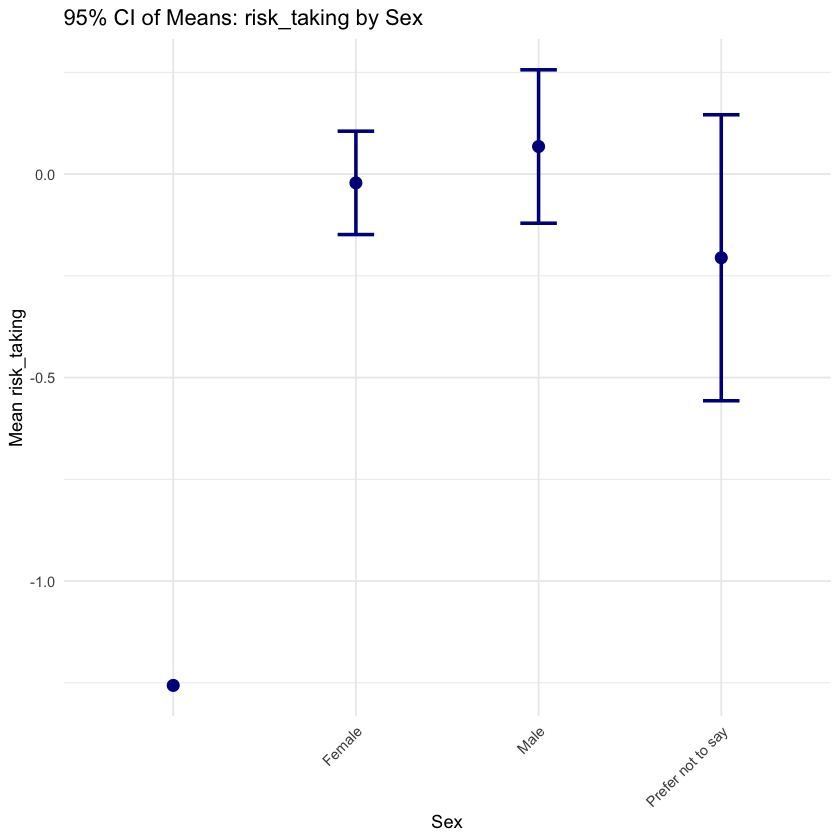

In [146]:
# Plot for 
plot_ci_means("Sex", "risk_taking") 

In [147]:
# Use non-parametric test if normality is violated
# Use Wixon rank sum test (Mann-Whitney U test)
print("--- Mann-Whitney U Test (Non-parametric) ---")
mann_whitney_result <- wilcox.test(risk_taking ~ Sex, 
                                    data = gender_gap_df, 
                                    alternative = "two.sided")
print(mann_whitney_result)


[1] "--- Mann-Whitney U Test (Non-parametric) ---"

	Wilcoxon rank sum test with continuity correction

data:  risk_taking by Sex
W = 13071, p-value = 0.5764
alternative hypothesis: true location shift is not equal to 0



In [148]:
# Levene test for risk_taking 
riks_leventest = leveneTest(risk_taking ~ Where.are.you.currently.studying., data = gender_gap_df)
print(riks_leventest)

Levene's Test for Homogeneity of Variance (center = median)
       Df F value   Pr(>F)   
group   1  7.5731 0.006234 **
      349                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [150]:
# Run Aligned Rank Transform ANOVA
library(ARTool)
art_model <- art(risk_taking ~ Sex * Age, data = gender_gap_df)
anova(art_model)

,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sex,Sex,1,343,844.9121,3595420,0.08060389,0.776652004
Age,Age,3,343,88742.0103,3511625,2.88930879,0.035546888
Sex:Age,Sex:Age,3,343,122883.6386,3476081,4.04182013,0.007614978


[1] "--- Sample sizes for Sex * Age combinations ---"


Sex,Age,n
<fct>,<fct>,<int>
Female,18-29,210
Female,30-39,17
Female,40-49,8
Female,50-59,1
Male,18-29,96
Male,30-39,13
Male,40-49,5
Male,50-59,1


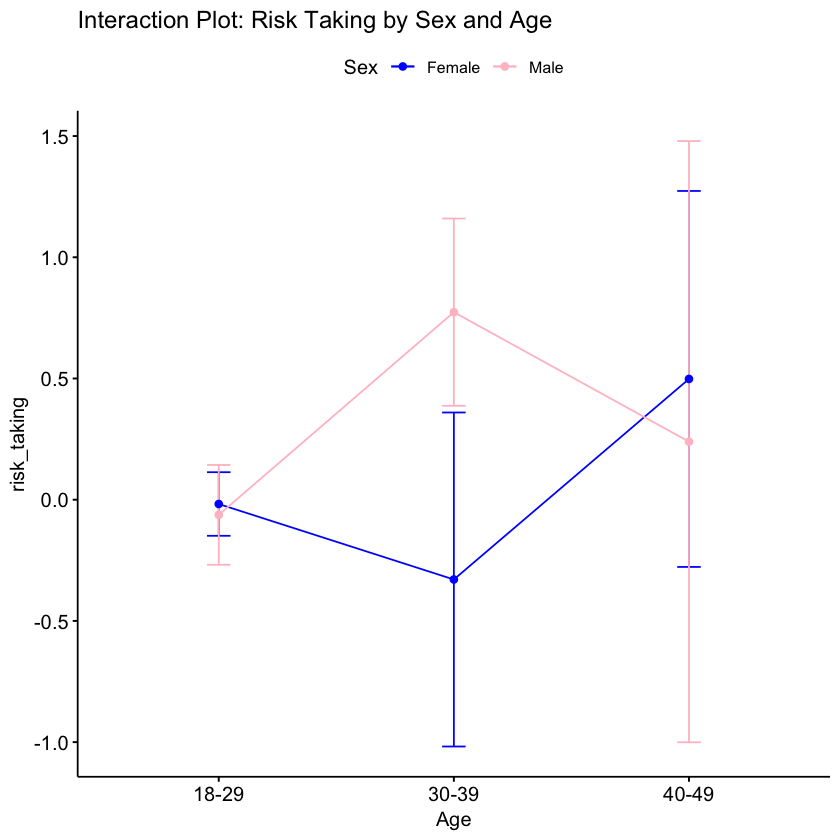

In [151]:
# Check sample sizes for each Sex * Age combination
print("--- Sample sizes for Sex * Age combinations ---")
gender_gap_df %>%
  group_by(Sex, Age) %>%
  summarise(n = n(), .groups = 'drop')

# Filter to keep only groups with n >= 2 (or n >= 3 for better SE calculation)
gender_gap_df_filtered <- gender_gap_df %>%
  group_by(Sex, Age) %>%
  filter(n() >= 3) %>%
  ungroup() %>%
  droplevels()

# Now plot with filtered data
library(ggpubr)
ggline(gender_gap_df_filtered, x = "Age", y = "risk_taking", 
       color = "Sex",
       palette = c("blue", "pink"),
       add = c("mean_ci"),
       title = "Interaction Plot: Risk Taking by Sex and Age")

In [152]:
install.packages("ggpubr")


The downloaded binary packages are in
	/var/folders/6j/vbxn4v7s5xl046hwx1j8ppnm0000gn/T//RtmpFd7ZMt/downloaded_packages


## Hypothesis 3: Education Level & Self afficacy 

In [153]:
#  There is no significant difference in self afficacy scores across different education levels
# Parametric test for sekf_efficacy already done

summary(df_pca$Education)

College     Graduate Postgraduate    Secondary 
         144          125           80           10

In [154]:
# Run Anova eittherway
# Run Anova
print("--- ANOVA Result ---")
anova_result <- aov(self_efficacy ~ Education, data = df_pca)
summary(anova_result)

[1] "--- ANOVA Result ---"


             Df Sum Sq Mean Sq F value Pr(>F)  
Education     3     11   3.672   3.756 0.0111 *
Residuals   355    347   0.977                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [155]:
# Group samples are unequal sizes hence use Kruskal-Wallis test
print("--- Kruskal-Wallis Test (Non-parametric) ---")
kruskal_result <- kruskal.test(self_efficacy ~ Education, data = df_pca)
print(kruskal_result)

[1] "--- Kruskal-Wallis Test (Non-parametric) ---"

	Kruskal-Wallis rank sum test

data:  self_efficacy by Education
Kruskal-Wallis chi-squared = 12.05, df = 3, p-value = 0.007212



In [156]:
# Effect size calculation for Kruskal-Wallis test
library(rstatix)
effect_size_result <- kruskal_effsize(df_pca, 
                                      self_efficacy ~ Education,
                                      ci = TRUE,
                                      conf.level = 0.95)
print(effect_size_result)

# A tibble: 1 × 7
  .y.               n effsize conf.low conf.high method  magnitude
* <chr>         <int>   <dbl>    <dbl>     <dbl> <chr>   <ord>    
1 self_efficacy   359  0.0255   0.0021      0.08 eta2[H] small    


In [157]:
# Post hoc for kruskaal - wallis
# Use Dunn's test with Bonferroni correction
library(FSA)
print("--- Dunn's Post Hoc Test with Bonferroni Correction ---")
dunn_result <- dunnTest(self_efficacy ~ Education, data = df_pca, method = "holm")
print(dunn_result)

[1] "--- Dunn's Post Hoc Test with Bonferroni Correction ---"


Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




                Comparison          Z     P.unadj      P.adj
1       College - Graduate -2.7351679 0.006234847 0.03740908
2   College - Postgraduate -2.7341605 0.006253954 0.03126977
3  Graduate - Postgraduate -0.3275157 0.743277875 0.74327788
4      College - Secondary -1.8034088 0.071324032 0.28529613
5     Graduate - Secondary -0.7771268 0.437083989 1.00000000
6 Postgraduate - Secondary -0.6216174 0.534193501 1.00000000


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


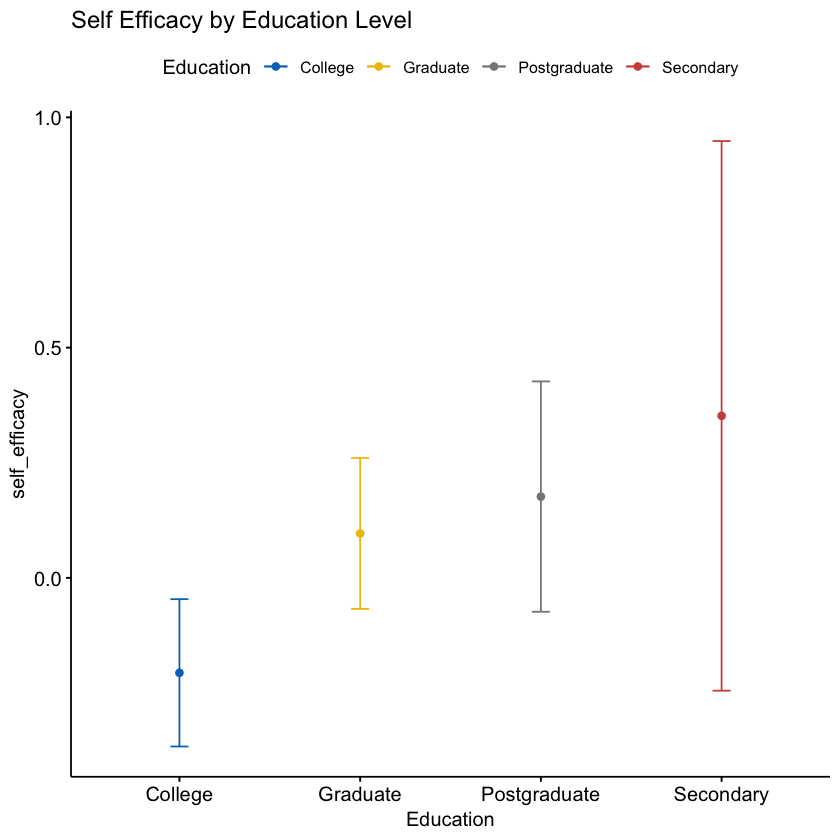

In [158]:

ggline(df_pca, x = "Education", y = "self_efficacy", 
       color = "Education",
       palette = "jco",
       add = c("mean_ci"),
       title = "Self Efficacy by Education Level")

## Hypothesis set 4: Entrepreneurial intention 

In [159]:
# (IV): Do.you.think.you.will.ever.start.a.business. (Yes vs. No)
summary(df$Do.you.think.you.will.ever.start.a.business.)

No Yes 
 68 291

In [160]:
# Parametric assumptions are violated
# Use Mann-Whitney U test
print("--- Mann-Whitney U Test (Non-parametric) ---")
mann_whitney_result <- wilcox.test(confidence ~ df$Do.you.think.you.will.ever.start.a.business., 
                                    data = df_pca)
print(mann_whitney_result) 

# Chek against risk taking using wilcox test
print("--- Mann-Whitney U Test on Risk Taking (Non-parametric) ---")
mann_whitney_risk_result <- wilcox.test(risk_taking ~ df$Do.you.think.you.will.ever.start.a.business., 
                                    data = df_pca)
print(mann_whitney_risk_result)

[1] "--- Mann-Whitney U Test (Non-parametric) ---"

	Wilcoxon rank sum test with continuity correction

data:  confidence by df$Do.you.think.you.will.ever.start.a.business.
W = 4487, p-value = 2.266e-12
alternative hypothesis: true location shift is not equal to 0

[1] "--- Mann-Whitney U Test on Risk Taking (Non-parametric) ---"

	Wilcoxon rank sum test with continuity correction

data:  risk_taking by df$Do.you.think.you.will.ever.start.a.business.
W = 6082, p-value = 7.54e-07
alternative hypothesis: true location shift is not equal to 0



In [161]:
# Effect size calculation for Mann-Whitney U test for confidence
effect_result <- wilcox_effsize(df_pca, 
                                confidence ~ Do.you.think.you.will.ever.start.a.business.,
                                paired = FALSE,
                                ci = TRUE,
                                conf.level = 0.95)
print(effect_result)

# Effect size calculation for Mann-Whitney U test for risk taking
effect_risk_result <- wilcox_effsize(df_pca, 
                                risk_taking ~ Do.you.think.you.will.ever.start.a.business.,
                                paired = FALSE,
                                ci = TRUE,
                                conf.level = 0.95)
print(effect_risk_result)


# A tibble: 1 × 9
  .y.        group1 group2 effsize    n1    n2 conf.low conf.high magnitude
* <chr>      <chr>  <chr>    <dbl> <int> <int>    <dbl>     <dbl> <ord>    
1 confidence No     Yes      0.370    68   291     0.27      0.46 moderate 
# A tibble: 1 × 9
  .y.         group1 group2 effsize    n1    n2 conf.low conf.high magnitude
* <chr>       <chr>  <chr>    <dbl> <int> <int>    <dbl>     <dbl> <ord>    
1 risk_taking No     Yes      0.261    68   291     0.16      0.36 small    


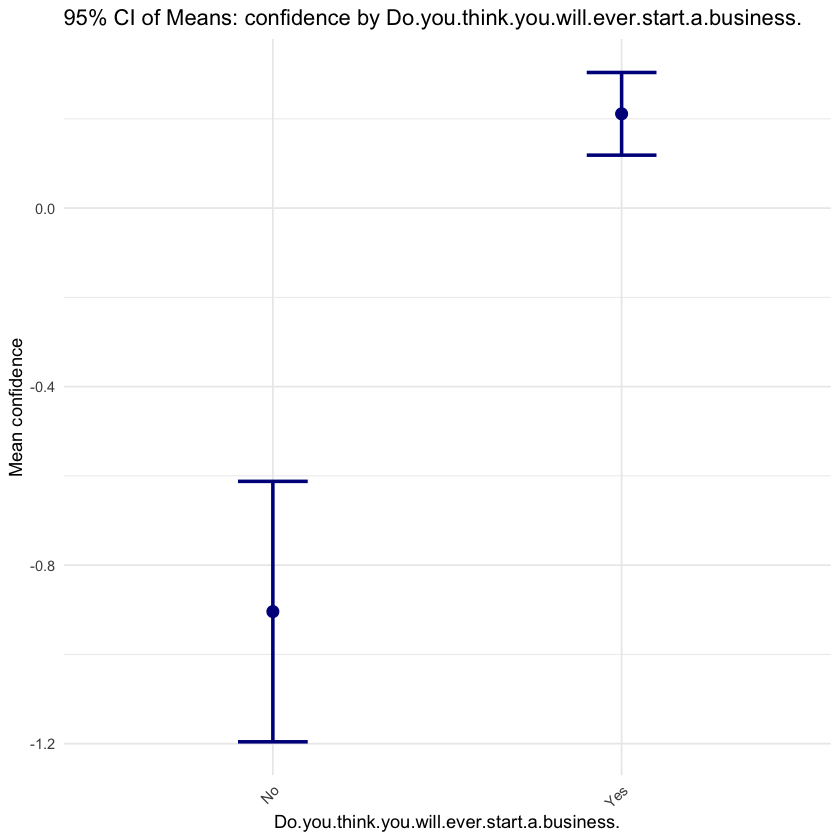

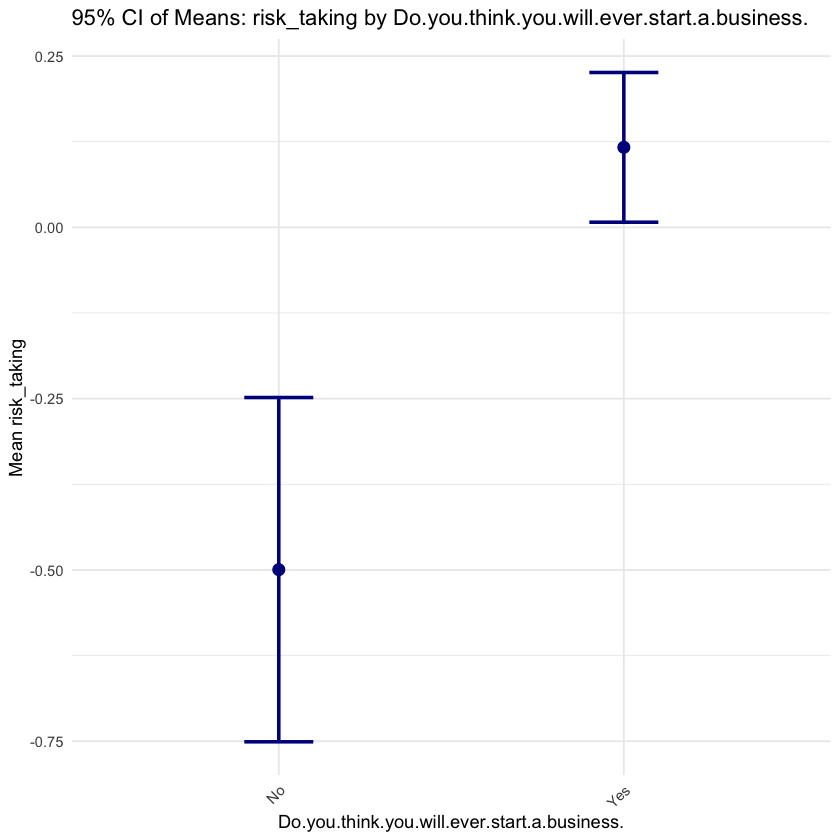

In [162]:
# Plots for confidence and risk taking by entrepreneurial intention
plot_ci_means("Do.you.think.you.will.ever.start.a.business.", "confidence")
plot_ci_means("Do.you.think.you.will.ever.start.a.business.", "risk_taking")

`summarise()` has grouped output by 'Where.are.you.currently.studying.'. You
can override using the `.groups` argument.


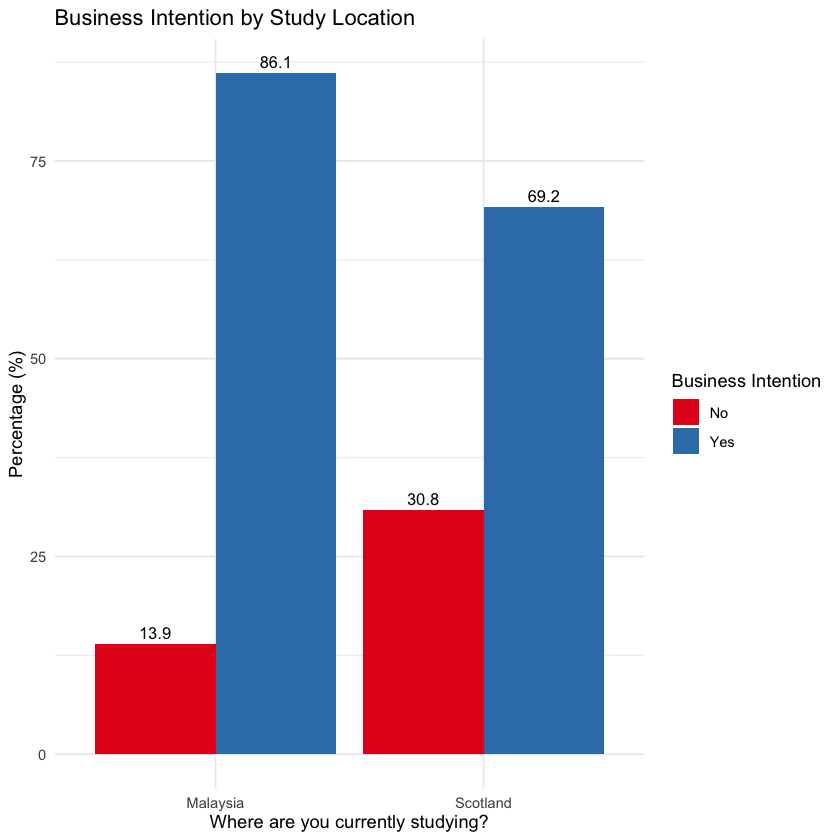

In [163]:
# Plot to visualize where they are studying and business intention, use percentage to avoid count bias
library(ggplot2)
library(dplyr) 

df_business_intent <- df %>%
  group_by(Where.are.you.currently.studying., Do.you.think.you.will.ever.start.a.business.) %>%
  summarise(Count = n()) %>%
  group_by(Where.are.you.currently.studying.) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)   

ggplot(df_business_intent, aes(x = Where.are.you.currently.studying., y = Percentage, fill = Do.you.think.you.will.ever.start.a.business.)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = round(Percentage, 1)), 
            position = position_dodge(width = 0.9), 
            vjust = -0.5, 
            size = 3.5) +
  labs(title = "Business Intention by Study Location",
       x = "Where are you currently studying?",
       y = "Percentage (%)") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1", name = "Business Intention")

In [164]:
# Install required packages
install.packages("shinythemes")
library(shiny)
library(shinythemes)
library(dplyr)
library(rstatix)
library(ggplot2)
library(stringr)

# Define UI
ui <- fluidPage(
  titlePanel("Entrepreneurship Orientation Analysis: Scotland vs Malaysia"),
  theme = shinytheme("flatly"),
  
  sidebarLayout(
    sidebarPanel(
      h3("📋 Select a Hypothesis to Explore"),
      
      selectInput("hypothesis", "Choose Hypothesis:",
                  choices = c(
                    "Hypothesis 1: Cultural Context Effect (Location)" = "h1",
                    "Hypothesis 2: Gender Gap in Risk Propensity" = "h2",
                    "Hypothesis 3: Education Level & Self-Efficacy" = "h3",
                    "Hypothesis 4: Entrepreneurial Intention" = "h4"
                  )),
      
      hr(),
      
      # Dynamic dependent variable selection
      h4("Select Measure(s) to Compare:"),
      uiOutput("dv_selector"),
      
      hr(),
      actionButton("run_test", "Run Analysis →", class = "btn-primary btn-lg btn-block",
                   style = "margin-top: 20px;")
    ),
    
    mainPanel(
      tabsetPanel(
        tabPanel("📈 Results & Interpretation",
                 br(),
                 h2(textOutput("hypothesis_title")),
                 p(textOutput("hypothesis_desc")),
                 br(),
                 h3(textOutput("test_type_title")),
                 verbatimTextOutput("test_results"),
                 br(),
                 h3("🎯 What This Means"),
                 textOutput("interpretation"),
                 textOutput("simple_meaning")
        ),
        
        tabPanel("📊 Visualization",
                 plotOutput("plot_results", height = "600px")
        ),
        
        tabPanel("📋 Summary Stats",
                 h3("Group Comparison"),
                 tableOutput("summary_table"),
                 br(),
                 h3("Effect Size"),
                 textOutput("effect_size"),
                 textOutput("effect_meaning")
        )
      )
    )
  )
)

# Define Server
server <- function(input, output, session) {
  
  # Hypothesis configurations
  hypothesis_config <- list(
    h1 = list(
      title = "Hypothesis 1: The Cultural Context Effect",
      description = "Testing if students' entrepreneurial orientation differs based on where they study (Malaysia vs Scotland)",
      iv = "Where.are.you.currently.studying.",
      dvs = c("autonomy", "risk_taking", "self_efficacy"),
      default_dv = "autonomy"
    ),
    h2 = list(
      title = "Hypothesis 2: The Gender Gap in Risk Propensity",
      description = "Testing if there's a significant difference in risk-taking behavior between males and females",
      iv = "Sex",
      dvs = c("risk_taking"),
      default_dv = "risk_taking"
    ),
    h3 = list(
      title = "Hypothesis 3: Education Level & Self-Efficacy",
      description = "Testing if self-efficacy differs across different education levels",
      iv = "Education",
      dvs = c("self_efficacy"),
      default_dv = "self_efficacy"
    ),
    h4 = list(
      title = "Hypothesis 4: Entrepreneurial Intention",
      description = "Testing if students who intend to start a business differ in confidence and risk-taking",
      iv = "Do.you.think.you.will.ever.start.a.business.",
      dvs = c("confidence", "risk_taking"),
      default_dv = "confidence"
    )
  )
  
  # Dynamic DV selector based on hypothesis
  output$dv_selector <- renderUI({
    hyp <- input$hypothesis
    config <- hypothesis_config[[hyp]]
    
    if (length(config$dvs) == 1) {
      p(strong(config$dvs), "will be analyzed")
    } else {
      checkboxGroupInput("dv_selection", 
                        label = NULL,
                        choices = config$dvs,
                        selected = config$default_dv,
                        inline = FALSE)
    }
  })
  
  # Hypothesis title
  output$hypothesis_title <- renderText({
    config <- hypothesis_config[[input$hypothesis]]
    config$title
  })
  
  # Hypothesis description
  output$hypothesis_desc <- renderText({
    config <- hypothesis_config[[input$hypothesis]]
    config$description
  })
  
  # Run analysis when button clicked
  analysis_results <- eventReactive(input$run_test, {
    
    hyp <- input$hypothesis
    config <- hypothesis_config[[hyp]]
    iv <- config$iv
    
    # Get selected DVs
    if (length(config$dvs) == 1) {
      dvs <- config$dvs
    } else {
      dvs <- input$dv_selection
      if (is.null(dvs) || length(dvs) == 0) {
        dvs <- config$default_dv
      }
    }
    
    # Special handling for Hypothesis 2 (Gender)
    if (hyp == "h2") {
      data_clean <- df_pca[df_pca$Sex %in% c("Male", "Female"), ]
      data_clean$Sex <- droplevels(data_clean$Sex)
    } else {
      data_clean <- df_pca
    }
    
    # Remove NA values
    all_vars <- c(iv, dvs)
    data_clean <- data_clean %>% drop_na(all_of(all_vars))
    
    # Get unique groups
    n_groups <- n_distinct(data_clean[[iv]])
    
    results <- list()
    results$data <- data_clean
    results$iv <- iv
    results$dvs <- dvs
    results$n_groups <- n_groups
    results$hypothesis <- hyp
    
    # AUTO-SELECT TEST TYPE BASED ON DATA
    if (length(dvs) > 1) {
      # Multiple DVs = Run separate tests for each DV
      results$test_name <- "Multiple Measure Comparison"
      results$multiple_tests <- TRUE
      
      test_list <- list()
      for (dv in dvs) {
        formula_obj <- as.formula(paste(dv, "~", iv))
        
        if (n_groups == 2) {
          test <- wilcox.test(formula_obj, data = data_clean)
          effect <- wilcox_effsize(data_clean, formula_obj, paired = FALSE)
          test_list[[dv]] <- list(
            test_type = "Mann-Whitney U",
            p_value = test$p.value,
            statistic = test$statistic,
            effect_size = effect$effsize
          )
        } else {
          test <- kruskal.test(formula_obj, data = data_clean)
          effect <- kruskal_effsize(data_clean, formula_obj)
          test_list[[dv]] <- list(
            test_type = "Kruskal-Wallis",
            p_value = test$p.value,
            statistic = test$statistic,
            effect_size = effect$effsize
          )
        }
      }
      results$test_list <- test_list
      results$p_value <- test_list[[1]]$p_value
      
    } else {
      # Single DV
      dv <- dvs[1]
      results$dv <- dv
      results$multiple_tests <- FALSE
      
      formula_obj <- as.formula(paste(dv, "~", iv))
      
      if (n_groups == 2) {
        test <- wilcox.test(formula_obj, data = data_clean)
        effect <- wilcox_effsize(data_clean, formula_obj, paired = FALSE)
        
        results$test_name <- "Mann-Whitney U Test (Comparing 2 Groups)"
        results$p_value <- test$p.value
        results$statistic <- test$statistic
        results$effect_size <- effect$effsize
        
      } else {
        test <- kruskal.test(formula_obj, data = data_clean)
        effect <- kruskal_effsize(data_clean, formula_obj)
        
        results$test_name <- "Kruskal-Wallis Test (Comparing 3+ Groups)"
        results$p_value <- test$p.value
        results$statistic <- test$statistic
        results$effect_size <- effect$effsize
      }
    }
    
    results
  })
  
  # Test type title
  output$test_type_title <- renderText({
    res <- analysis_results()
    res$test_name
  })
  
  # Display test results
  output$test_results <- renderPrint({
    res <- analysis_results()
    
    if (res$multiple_tests) {
      cat("Comparing Multiple Measures:\n")
      cat(strrep("=", 60), "\n\n")
      
      for (dv in res$dvs) {
        test_info <- res$test_list[[dv]]
        cat("\n", dv, ":\n")
        cat("  Test:", test_info$test_type, "\n")
        cat("  Test Statistic:", round(test_info$statistic, 4), "\n")
        cat("  P-value:", format(test_info$p_value, scientific = TRUE, digits = 4), "\n")
        cat("  Effect Size:", round(test_info$effect_size, 4), "\n")
      }
    } else {
      cat(res$test_name, "\n")
      cat(strrep("=", 60), "\n\n")
      cat("Test Statistic:", round(res$statistic, 4), "\n")
      cat("P-value:", format(res$p_value, scientific = TRUE, digits = 4), "\n")
      cat("Effect Size:", round(res$effect_size, 4), "\n\n")
    }
  })
  
  # Simple interpretation
  output$interpretation <- renderText({
    res <- analysis_results()
    if (is.null(res$p_value)) return("Run analysis to see results")
    
    p_val <- res$p_value
    
    if (p_val < 0.001) {
      "✓ VERY STRONG DIFFERENCE (p < 0.001)"
    } else if (p_val < 0.01) {
      "✓ STRONG DIFFERENCE (p < 0.01)"
    } else if (p_val < 0.05) {
      "✓ SIGNIFICANT DIFFERENCE (p < 0.05)"
    } else {
      "✗ NO SIGNIFICANT DIFFERENCE (p ≥ 0.05)"
    }
  })
  
  # Plain language meaning
  output$simple_meaning <- renderText({
    res <- analysis_results()
    if (is.null(res$p_value)) return("")
    
    p_val <- res$p_value
    iv_name <- str_replace_all(res$iv, "\\.", " ")
    
    if (res$multiple_tests) {
      dv_text <- paste(res$dvs, collapse=", ")
    } else {
      dv_text <- res$dv
    }
    
    if (p_val < 0.05) {
      paste("\n✅ YES, there IS a real difference in", dv_text, 
            "based on", iv_name, 
            ".\n(This is unlikely to be due to chance.)")
    } else {
      paste("\n❌ NO, there is NO significant difference in", dv_text, 
            "based on", iv_name, 
            ".\n(Any differences we see are likely just random variation.)")
    }
  })
  
  # Visualization
  output$plot_results <- renderPlot({
    res <- analysis_results()
    if (is.null(res$data)) return(NULL)
    
    if (res$multiple_tests) {
      # Create plots for each DV
      plots <- lapply(res$dvs, function(dv) {
        data_plot <- res$data %>%
          group_by(.data[[res$iv]]) %>%
          summarise(
            mean = mean(.data[[dv]], na.rm = TRUE),
            se = sd(.data[[dv]], na.rm = TRUE) / sqrt(n()),
            n = n(),
            .groups = 'drop'
          ) %>%
          mutate(ci_lower = mean - 1.96 * se,
                 ci_upper = mean + 1.96 * se)
        
        ggplot(data_plot, aes(x = .data[[res$iv]], y = mean, fill = .data[[res$iv]])) +
          geom_bar(stat = "identity", alpha = 0.75, color = "black", linewidth = 0.5) +
          geom_errorbar(aes(ymin = ci_lower, ymax = ci_upper), 
                        width = 0.3, linewidth = 1, color = "darkred") +
          geom_text(aes(label = paste("n=", n), y = ci_upper + 0.1), 
                    size = 3, fontface = "bold") +
          labs(
            title = paste("Average", dv),
            x = res$iv,
            y = paste("Mean", dv)
          ) +
          theme_minimal() +
          theme(
            axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
            plot.title = element_text(size = 12, face = "bold"),
            legend.position = "none"
          ) +
          scale_fill_brewer(palette = "Set2")
      })
      
      do.call(gridExtra::grid.arrange, c(plots, ncol = 2))
    } else {
      # Single DV plot
      data_plot <- res$data %>%
        group_by(.data[[res$iv]]) %>%
        summarise(
          mean = mean(.data[[res$dv]], na.rm = TRUE),
          se = sd(.data[[res$dv]], na.rm = TRUE) / sqrt(n()),
          n = n(),
          .groups = 'drop'
        ) %>%
        mutate(ci_lower = mean - 1.96 * se,
               ci_upper = mean + 1.96 * se)
      
      ggplot(data_plot, aes(x = .data[[res$iv]], y = mean, fill = .data[[res$iv]])) +
        geom_bar(stat = "identity", alpha = 0.75, color = "black", linewidth = 0.5) +
        geom_errorbar(aes(ymin = ci_lower, ymax = ci_upper), 
                      width = 0.3, linewidth = 1, color = "darkred") +
        geom_text(aes(label = paste("n=", n), y = ci_upper + 0.1), 
                  size = 4, fontface = "bold") +
        labs(
          title = paste("Average", res$dv, "by", res$iv),
          x = res$iv,
          y = paste("Average", res$dv),
          subtitle = "Error bars show 95% Confidence Interval"
        ) +
        theme_minimal() +
        theme(
          axis.text.x = element_text(angle = 45, hjust = 1, size = 11),
          plot.title = element_text(size = 14, face = "bold"),
          legend.position = "none"
        ) +
        scale_fill_brewer(palette = "Set2")
    }
  })
  
  # Summary statistics table
  output$summary_table <- renderTable({
    res <- analysis_results()
    if (is.null(res$data)) return(NULL)
    
    if (res$multiple_tests) {
      # Show summary for first DV selected
      dv <- res$dvs[1]
    } else {
      dv <- res$dv
    }
    
    res$data %>%
      group_by(.data[[res$iv]]) %>%
      summarise(
        "Sample Size (n)" = n(),
        "Average" = round(mean(.data[[dv]], na.rm = TRUE), 2),
        "Std Dev" = round(sd(.data[[dv]], na.rm = TRUE), 2),
        "Min" = round(min(.data[[dv]], na.rm = TRUE), 2),
        "Max" = round(max(.data[[dv]], na.rm = TRUE), 2),
        .groups = 'drop'
      )
  }, striped = TRUE, hover = TRUE, bordered = TRUE)
  
  # Effect size interpretation
  output$effect_size <- renderText({
    res <- analysis_results()
    if (is.null(res$effect_size)) return("N/A for this test")
    
    eff <- res$effect_size
    if (eff < 0.1) {
      paste("Effect Size:", round(eff, 3), "→ NEGLIGIBLE (very small)")
    } else if (eff < 0.3) {
      paste("Effect Size:", round(eff, 3), "→ SMALL (noticeable)")
    } else if (eff < 0.5) {
      paste("Effect Size:", round(eff, 3), "→ MEDIUM (important)")
    } else {
      paste("Effect Size:", round(eff, 3), "→ LARGE (very important)")
    }
  })
  
  output$effect_meaning <- renderText({
    res <- analysis_results()
    if (is.null(res$effect_size)) return("")
    
    eff <- res$effect_size
    if (eff < 0.3) {
      "\n(Even if there's a difference, it's quite small in practical terms.)"
    } else if (eff < 0.5) {
      "\n(This is a meaningful difference that matters in real situations.)"
    } else {
      "\n(This is a large, important difference.)"
    }
  })
}

# Run the app
shinyApp(ui = ui, server = server)


The downloaded binary packages are in
	/var/folders/6j/vbxn4v7s5xl046hwx1j8ppnm0000gn/T//RtmpFd7ZMt/downloaded_packages



Listening on http://127.0.0.1:7400

